### SALES ANALYSIS

### Task1: Import data

In [376]:
import pandas as pd
import os
import matplotlib.pyplot as plt
## file_name = input('Please key in the  filename: ')
## df = pd.read_csv(file_name)
## df

In [377]:
path = 'D:/study/DA/python/project/'
dataframe = pd.read_csv(path + 'sales2019_1.csv')
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


## task 2 : Clear and Preprocess data 

In [379]:
os.listdir(path)

['sale.ipynb',
 'sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

In [380]:
frames = []
for file in os.listdir(path):
        if file.endswith('.csv'):
                filepath = path + file
                df1 = pd.read_csv(filepath)
                frames.append(df1)
result = pd.concat(frames)
df = result
df.to_csv("summary_2019.csv", index = False)

## Task 2.2 : add month column

In [382]:
df['Month'] = df['Order Date'].str.slice(0,2,1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [383]:
print(set((df['Month'])))

{'02', '09', '11', nan, '06', '10', 'Or', '04', '03', '05', '12', '08', '01', '07'}


In [384]:
## task 2.3 get rid of 'Nan' and 'or' value

In [385]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [386]:
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## task 3 : Reporting

In [388]:
## task 3.1: what was the best month for sales? how much was earned that month?

In [389]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast= 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast= 'float')

In [390]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [391]:
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [392]:
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [393]:
sales_value = df.groupby('Month').sum()['Sales']
sales_value.max()

4613443.5

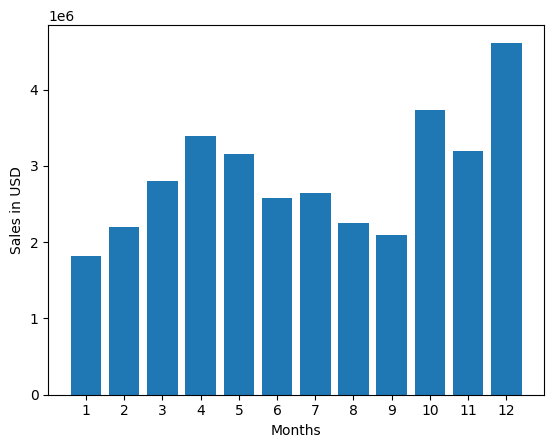

In [394]:
months = range(1,13)
plt.bar(x = months, height= sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

### task 3.2 what city has the best sales?

In [396]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [397]:
address_to_city = lambda address:address.split(',')[1]

In [398]:
df['City'] = df['Purchase Address'].apply(address_to_city)
df.groupby('City').sum()['Sales']

City
Atlanta          2795498.50
Austin           1819581.75
Boston           3661642.00
Dallas           2767975.50
Los Angeles      5452571.00
New York City    4664317.50
Portland         2320490.50
San Francisco    8262204.00
Seattle          2747755.50
Name: Sales, dtype: float32

In [399]:
Sales_value_city = df.groupby('City').sum()['Sales']
Sales_value_city.max()

8262204.0

In [400]:
cities_1 = [city for city, sales in Sales_value_city.items()]
print(cities_1)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


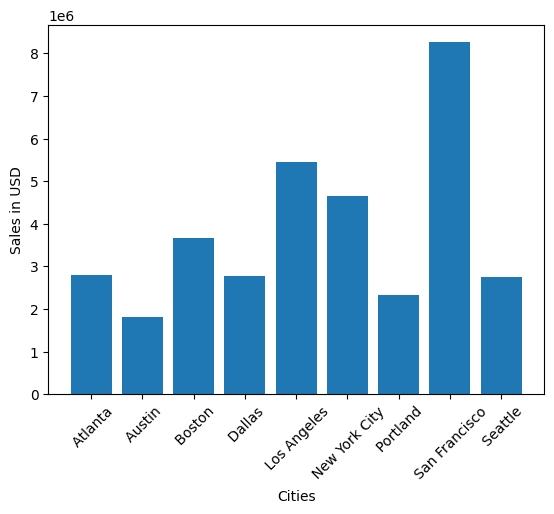

In [401]:
cities = []
for city, sales in Sales_value_city.items():
    cities.append(city)

plt.bar(x= cities, height= Sales_value_city)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.xticks(cities, rotation = 45)
plt.show()


## Task4: what products are most often sold togother?

In [402]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [403]:
df_dup = df[df['Order ID'].duplicated(keep = False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
41,141275,USB-C Charging Cable,1,11.95,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin
42,141275,Wired Headphones,1,11.99,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin
57,141290,Apple Airpods Headphones,1,150.00,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles
58,141290,AA Batteries (4-pack),3,3.84,11.52,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles
133,141365,Vareebadd Phone,1,400.00,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,New York City


In [411]:
def groupProduct(product):
    return ', '.join(product)

In [409]:
groupProduct = lambda prodcut: ', '.join(prodcut)

In [416]:
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_22340\2900918473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,All Product
41,141275,USB-C Charging Cable,1,11.95,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,New York City,"Vareebadd Phone, Wired Headphones"


In [421]:
df_dup = df_dup[['Order ID', 'All Product']].drop_duplicates()
df_dup

,Order ID,All Product
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [424]:
df_dup['All Product'].value_counts().head(10)

All Product
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

### Task 5: what product sold the most? why do you think it sold the most?

In [425]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,All Product
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston,NaN
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland,NaN
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco,NaN
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,NaN
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin,NaN


In [426]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
all_products

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

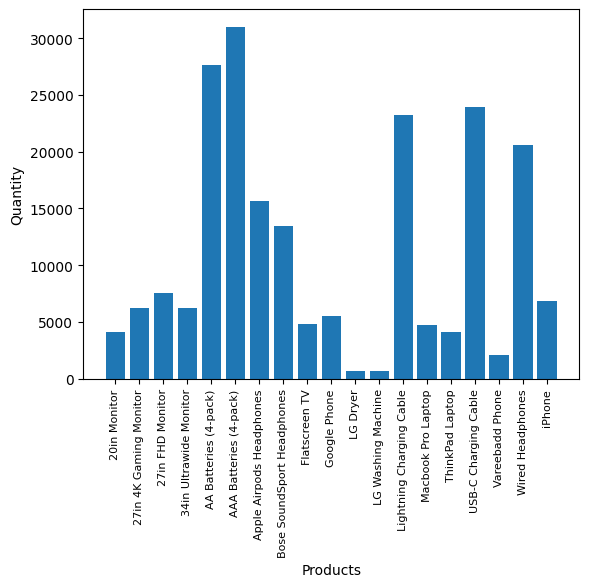

In [432]:
products = [products for products, quant in all_products.items()]
plt.bar(x= products, height= all_products)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.xticks(rotation = 90, size = 8)
plt.show()

In [439]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,All Product
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston,NaN
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland,NaN
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco,NaN
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,NaN
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin,NaN


In [446]:

df['Product'].dtype

dtype('O')

In [453]:
price = df.groupby('Product')['Price Each'].mean()
price

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

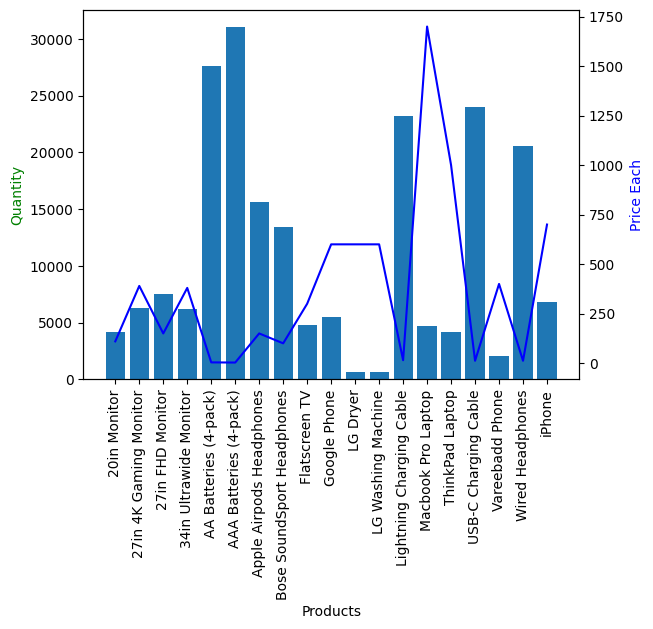

In [471]:
x = products
y1 = all_products
y2 = price

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1)
ax2.plot(x, y2, 'b-')


ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Price Each', color='b')
ax1.set_xticks(range(len(products))) 
ax1.set_xticklabels(products, rotation = 90)

plt.show()

task 6: what time should we display ads to maximize the likeihood of customer's buying product?

In [475]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,All Product
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,NaN
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,NaN
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,NaN
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,NaN
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,NaN


In [476]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [479]:
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,All Product,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,NaN,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,NaN,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,NaN,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,NaN,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,NaN,11


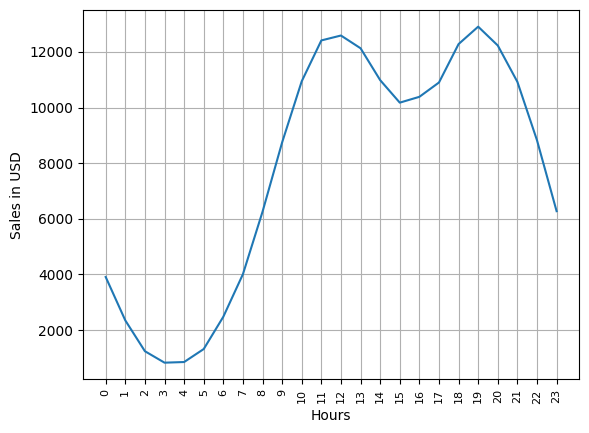

In [485]:
Sales_value_hours = df.groupby('Hours')['Sales'].count()
hours = [hours for hours, value in Sales_value_hours.items()]

plt.plot(hours, Sales_value_hours)
plt.grid()
plt.xticks(hours, rotation = 90, size = 8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()